# Final Project

#### The purpose of this assignment is to find a topic that is interesting to you. Then present an interesting aspect of the data using descriptive text and data visualizations.

#### Author: Tyler Laudenslager
#### CSC 223 - Advanced Scientific Programming
#### Fall 2020

## Introduction:

#### I am always trying to find new books to read and I tend to search for lists of the best books of all time on the internet for a guide on what to read next. Naturally the first dataset I chose for this assignment is amazon's top 50 bestselling books from 2009-2019. This dataset includes the name, author, average user rating, number of reviews, price, year and genre of each bestselling book. The second dataset includes all the books the goodreads community voted on to be the best books ever. This dataset has alot of information about each book notably name, authors, average rating, number of pages, and number of ratings. Goodreads.com is a website that helps book readers discover new books that they might be interested in based on the previous books they enjoyed.

#### Amazon Best Seller List Dataset - https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019

#### Goodreads Best Books Dataset - https://www.kaggle.com/meetnaren/goodreads-best-books

#### Goodreads Best Books Ever - https://www.goodreads.com/list/show/1.Best_Books_Ever

#### Kaggle - https://www.kaggle.com - is a online respository of public datasets. I found out about kaggle from searching for datasets using Google's dataset search engine.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#this line is needed to display graphs in jupyter notebooks
%matplotlib inline

In [2]:
#read the files into pandas dataframes
amzn_books_df = pd.read_csv('amazon_best_sellers.csv')
good_reads_books_df = pd.read_csv('good_reads_book_data.csv')


In [3]:
#rename certain columns for merging
good_reads_books_df.rename(columns={'book_title':'Name','book_rating':'good_reads_rating'},inplace=True)
#change the goodreads ratings to one decimal
good_reads_books_df['good_reads_rating'] = [x.round(1) for x in good_reads_books_df['good_reads_rating'].values]
#rename columns
amzn_books_df.rename(columns={'User Rating':'amazon_rating','Author':'author'},inplace=True)


#### The normal distribution function below was written by Dr.Schwesinger

In [4]:
#returns the normal distribution value
def normal_distribution(x, mu, sigma):
    return 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2/(2*sigma**2))

In [5]:
#counts all the unique values in a pandas dataframe column.
#params: input-> pandas dataframe, name of the column to count unique values.
#returns (dict) dictionary of unique values as keys and the frequency the unique values occur as values.
def count(data_frame,column_name):
    #create new dictionary
    author_bestseller_count = dict()
    for author_name in data_frame[column_name]:
        #if author name in the dictionary add one to the value
        if author_name in author_bestseller_count.keys():
            author_bestseller_count[author_name] += 1
        #else we add the author name to dictionary with starting value of 1
        else:
            author_bestseller_count[author_name] = 1
    return author_bestseller_count

#count all the unique values in the column named author in the amazon books dataframe.
author_dict = count(amzn_books_df,'author')

Number of Awards,1,2,3,4,5,6,7,8,9,10,11,12
Number of Authors,130,60,18,12,8,7,5,1,2,1,3,1


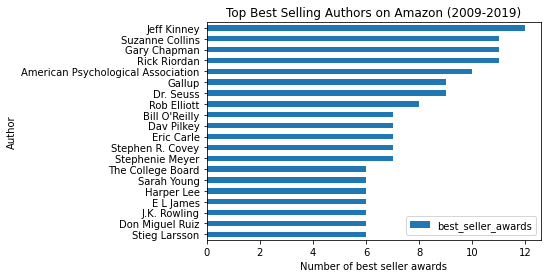

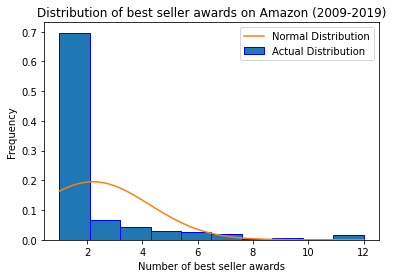

In [6]:
#create dataframe with author and best seller awards columns
author_dict_df = pd.DataFrame({'Author':author_dict.keys(),'best_seller_awards':author_dict.values()})
#filter out any authors that did not receive at least 6 best seller awards and sort by number of awards
top_author = author_dict_df.loc[author_dict_df['best_seller_awards'] >= 6].sort_values(by='best_seller_awards')
#set the index to author and plot using a horizontal bar chart
top_author = top_author.set_index('Author').plot(kind='barh')
#set the title of the graph
top_author.set_title('Top Best Selling Authors on Amazon (2009-2019)')
#set the x-axis label
top_author.set_xlabel('Number of best seller awards')
#plot the distribution of all best seller awards
author_best_sellers = author_dict_df.plot(kind='hist',density=True,edgecolor='b')
#obtain equally spaced x values from min to max number of awards
x_values = np.linspace(author_dict_df['best_seller_awards'].min(), author_dict_df['best_seller_awards'].max(), 50)
#find the average number of best seller awards authors obtained
best_seller_count_mean = author_dict_df['best_seller_awards'].mean()
#find the standard deviation
best_seller_count_std = author_dict_df['best_seller_awards'].std(ddof=0)
#plot the normal distribution line on the distribution plot
author_best_sellers.plot(x_values, normal_distribution(x_values,best_seller_count_mean,best_seller_count_std),
                                                                                 label='Normal Distribution')
#change the names of the legend and set labels for different parts of the graph
author_best_sellers.legend(["Normal Distribution", "Actual Distribution"])
author_best_sellers.set_title("Distribution of best seller awards on Amazon (2009-2019)")
author_best_sellers.set_xlabel("Number of best seller awards")
#display the number of awards each author received for more detailed information pertaining to the distribution graph.
rating_distribution_df = author_dict_df['best_seller_awards'].value_counts().to_frame()
rating_distribution_df.index.name = 'Number of Awards'
rating_distribution_df.columns=['Number of Authors']
#transform the table to be compact.
rating_distribution_df.sort_index().T

#### Looking at the histogram graph above we can clearly see that most authors that are included in the dataset received a best seller book award between the years 2009-2019 and then in subsequent years did not receive a best selling book award. However in the horizontal bar chart above we can see the top authors that were awarded multiple best seller awards in the same time frame. The top best selling authors on amazon graph shows that between 2009-2019 alot of the best selling authors wrote books for the young adult (YA) / Childern categories. Most notably the authors Rick Riordan, Dr. Seuss, Dav Pilkey and J.K. Rowling. The author Jeff Kinney is not a surprising top author in this dataset, because he wrote the Diary of a Wimpy Kid series.

,count,mean,std,min,25%,50%,75%,max
amazon_rating,493.0,4.573834,0.262076,3.3,4.5,4.6,4.8,4.9
good_reads_rating,493.0,4.148682,0.225830,3.3,4.0,4.2,4.3,4.6


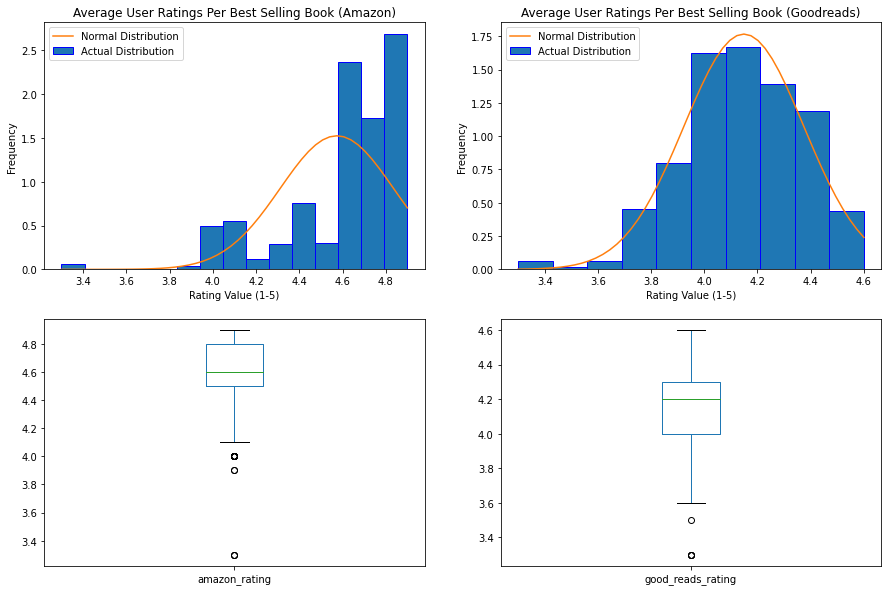

In [7]:
#create 4 graph slots in a 2x2 matrix
fig, axs = plt.subplots(2,2)
#create a dataframe that only includes the books that are included in both the goodreads
#dataset and the amazon dataset.
amzn_good_reads_df = amzn_books_df.merge(good_reads_books_df,on='Name')
#below is a easy way to change a series object into a dataframe object.
amzn_books_user_rating_df = amzn_good_reads_df['amazon_rating'].to_frame()
good_reads_books_user_rating_df = amzn_good_reads_df['good_reads_rating'].to_frame()
#create a distribution graph on goodreads ratings of amazon best sellers.
#this historgram will go to the top right corner of the 2x2 matrix.
good_reads_hist = good_reads_books_user_rating_df.plot(kind='hist', density=True, bins=10, 
                                                       edgecolor='b', ax=axs[0,1], figsize=(15,10))
#create a distribution graph of amazon best sellers between 2009-2019.
#this histogram will go to the top left corner of the 2x2 matrix.
amzn_ratings_hist = amzn_books_user_rating_df.plot(kind='hist', density=True, bins=15,
                                                   edgecolor='b', ax=axs[0,0], figsize=(15,10))
#label parts of the graphs.
good_reads_hist.set_title('Average User Ratings Per Best Selling Book (Goodreads)')
good_reads_hist.set_xlabel('Rating Value (1-5)')

amzn_ratings_hist.set_title('Average User Ratings Per Best Selling Book (Amazon)')
amzn_ratings_hist.set_xlabel('Rating Value (1-5)')

#create the normal distribution curve to be displayed along with the histogram.
#the larger the integer value at the end the smoother the line becomes.
x_values_good_reads = np.linspace(good_reads_books_user_rating_df.values.min(),
                            good_reads_books_user_rating_df.values.max(), 50)

x_values_amzn = np.linspace(amzn_books_df['amazon_rating'].min(),
                            amzn_books_df['amazon_rating'].max(), 50)

#get the average rating for goodreads and amazon.
good_ratings_mean = amzn_good_reads_df['good_reads_rating'].mean()
amzn_ratings_mean = amzn_good_reads_df['amazon_rating'].mean()

#get the standard deviation using a sample of the population.
good_ratings_std = amzn_good_reads_df['good_reads_rating'].std()
amzn_ratings_std = amzn_good_reads_df['amazon_rating'].std()

#plot the normal distribution curve for goodreads ratings.

good_reads_hist.plot(x_values_good_reads, normal_distribution(x_values_good_reads, good_ratings_mean, 
                                                        good_ratings_std),label='Normal Distribution')
good_reads_hist.legend(["Normal Distribution", "Actual Distribution"])

#create box plot of the good_reads user rating to show potential outliers in the data.
#this will be displayed in the bottom right corner of the 2x2 matrix.
good_reads_books_user_rating_df.plot(kind='box',ax=axs[1,1])

#plot the normal distribution line for the amazon ratings.
amzn_ratings_hist.plot(x_values_amzn, normal_distribution(x_values_amzn,amzn_ratings_mean,amzn_ratings_std),
                       label='Normal Distribution')
#rename the legend
amzn_ratings_hist.legend(["Normal Distribution", "Actual Distribution"])
#create box plot for amazon ratings that will be placed in the bottom left corner of the 2x2 matrix.
amzn_books_user_rating_df.plot(kind='box',ax=axs[1,0])
#display detailed information about the data being described.
#tranform the table to be compact.
df_rating_amzn = amzn_books_user_rating_df.describe().T
df_rating_goodreads = good_reads_books_user_rating_df.describe().T
goodreads_amzn_concat = pd.concat([df_rating_amzn,df_rating_goodreads])
goodreads_amzn_concat

#### The graphs above show the average user ratings per best selling book on amazon. The left histogram shows the average user rating that amazon users gave for the books. The right histogram shows the average user rating goodreads users gave for the same books. As we can see it seems that the amazon users tend to give higher ratings than the goodreads users did for the same books. Also the average user ratings on goodreads for the best selling books on amazon seem to be normally distributed. Accordingly the amazon user rating histogram shows the ratings are not as normally distributed as the goodreads user ratings histogram.

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
non_fiction,26,30,29,29,26,29,33,31,26,29,30
fiction,24,20,21,21,24,21,17,19,24,21,20


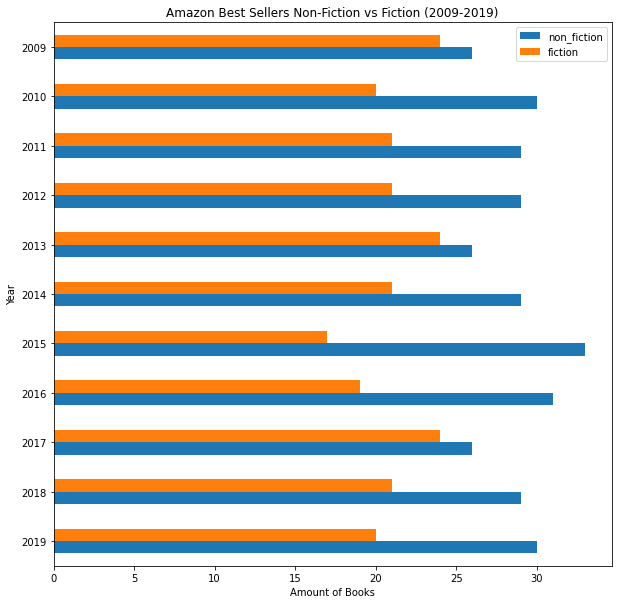

In [8]:
#group the rows of the dataframe by the year column
amzn_books_year = amzn_books_df.groupby('Year')
#remove duplicates
sorted_years = sorted(list(set(amzn_books_df['Year'].values)))
#create new dictionary
fiction_non_fiction_dict = dict()
#this will have the dictionary above become a dictionary where the year is the key and
#the value of the key is a dictionary with keys non_fiction and fiction each having
#the frequency the particular genre showed up in the year.
for year in sorted_years:
    fiction_non_fiction_df = amzn_books_year.get_group(year)['Genre'].value_counts()
    fiction_non_fiction_values = fiction_non_fiction_df.values
    fiction_non_fiction_dict[str(year)] = {'non_fiction':fiction_non_fiction_values[0],
                                           'fiction':fiction_non_fiction_values[1]}
    
#create a dataframe from a dictionary with the index as genres and years as columns
#we simply transformed the dataframe to get the years as the index and genres as the columns
fiction_non_fiction_values_df = pd.DataFrame(fiction_non_fiction_dict)
#plot as a bar chart to indicate the difference between non-fiction and fiction bestsellers per year
non_fiction_vs_fiction_bar = fiction_non_fiction_values_df.T.sort_index(ascending=False).plot(kind='barh',figsize=(10,10));
non_fiction_vs_fiction_bar.set_title('Amazon Best Sellers Non-Fiction vs Fiction (2009-2019)')
non_fiction_vs_fiction_bar.set_xlabel("Amount of Books")
non_fiction_vs_fiction_bar.set_ylabel("Year")
#display the dataframe for more detailed information
fiction_non_fiction_values_df

#### The bar chart above distinguishes the amount of non-fiction bestsellers vs fiction bestsellers during the years 2009 to 2019. From this graph we notice that more people chose to buy non-fiction books over fiction books during 2009-2019. Notice that in 2015 there is a huge difference between fiction and non-fiction best sellers. I believe this is because alot of people who purschase books on amazon were very interested in adult coloring books that year.

,amazon_rating,good_reads_rating,difference
Genre,,,
Fiction,4.536257,4.161988,0.374269
Non Fiction,4.658940,4.118543,0.540397


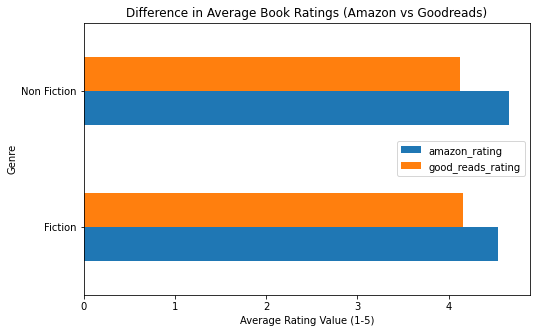

In [9]:
#set the index to the column name
amzn_book_name_df = amzn_books_df.set_index('Name')
#merge to only obtain the books that are in both goodreads and amazon datasets
amzn_good_reads_df = amzn_book_name_df.merge(good_reads_books_df,on='Name')
#create new dataframe by only including certain columns
good_reads_vs_amzn_ratings_df = amzn_good_reads_df[['Name','amazon_rating','good_reads_rating','Genre']]
#group by genre (non-fiction, fiction)
good_reads_amzn_genre_groups = good_reads_vs_amzn_ratings_df.groupby('Genre')
#find the mean rating of each genre
good_reads_amzn_mean_ratings = good_reads_amzn_genre_groups.mean()
#plot the bar chart of average ratings
ratings_bar_graph = good_reads_amzn_mean_ratings.plot(kind='barh',figsize=(8,5))
#change graph labels
ratings_bar_graph.set_title("Difference in Average Book Ratings (Amazon vs Goodreads)")
ratings_bar_graph.set_xlabel("Average Rating Value (1-5)");
#add a difference column to the dataframe.
good_reads_amzn_mean_ratings['difference'] = good_reads_amzn_mean_ratings['amazon_rating'] - good_reads_amzn_mean_ratings['good_reads_rating']
#display dataframe for detailed information about the graph
good_reads_amzn_mean_ratings

#### The bar chart above distinguishes the rating difference between genres on amazon compared to goodreads. As we can tell there is a smaller difference in ratings between amazon and goodreads in the Fiction genre of books. This would lead us to believe that amazon's fiction ratings on best seller books tend to have a better representation of how readers rated the book overall compared to non-fiction ratings.

## Conclusion:
#### The best selling authors from 2009-2019 tend to be young adult / children authors. However the bestselling books from 2009-2019 are of the non-fiction genre. The goodreads site tends to have more accurate ratings for best selling books that are listed on amazon. I believe this is because there are more people who review books on goodreads than amazon. The goodreads community tend to give conservative ratings for best selling books while amazon users have a tendency to give 5 star ratings more frequently for books they enjoyed.